## Dog/Cat Image Classification

### Background

Image classification is the task of assigning a label to an image based on its content. In this project, it involves distinguishing between images of dogs and cats.

The most common approach for image classification is using Convolutional Neural Networks (CNNs). CNNs are designed to automatically learn features like edges, textures, and shapes from images through multiple layers:

* Convolutional layers extract features.
* Pooling layers reduce dimensions.
* Fully connected layers make predictions.

Once trained on labeled images, the model can predict the class (in this case dog or cat) of new images.

### Data Visualization

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from main import get_loaders, evaluate, MODEL_PATH
from ImageCNN import ImageCNN
import torchvision
import torch
import torch.nn as nn
import pandas as pd
import seaborn as sns

In [6]:
def show_images_by_label(path: str, num_images: int=10, label:str="dog"):
    if label not in ("dog", "cat"):
        print(f"No images found for {label}. Only 'cat' and 'dog' are valid labels.")
        return
    
    image_files = [f for f in os.listdir(path) if f.startswith(label) and f.endswith("jpg")]
    image_files = image_files[:num_images]
    
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(image_files):
        image_path = os.path.join(path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.tight_layout()
    plt.show()   

Here we can see images of cats and dogs found in the dataset, note that note only are the images themselves different, but the sizes, lighting, image quality, etc. vastly differ. This is all taken into account when building the classifier.

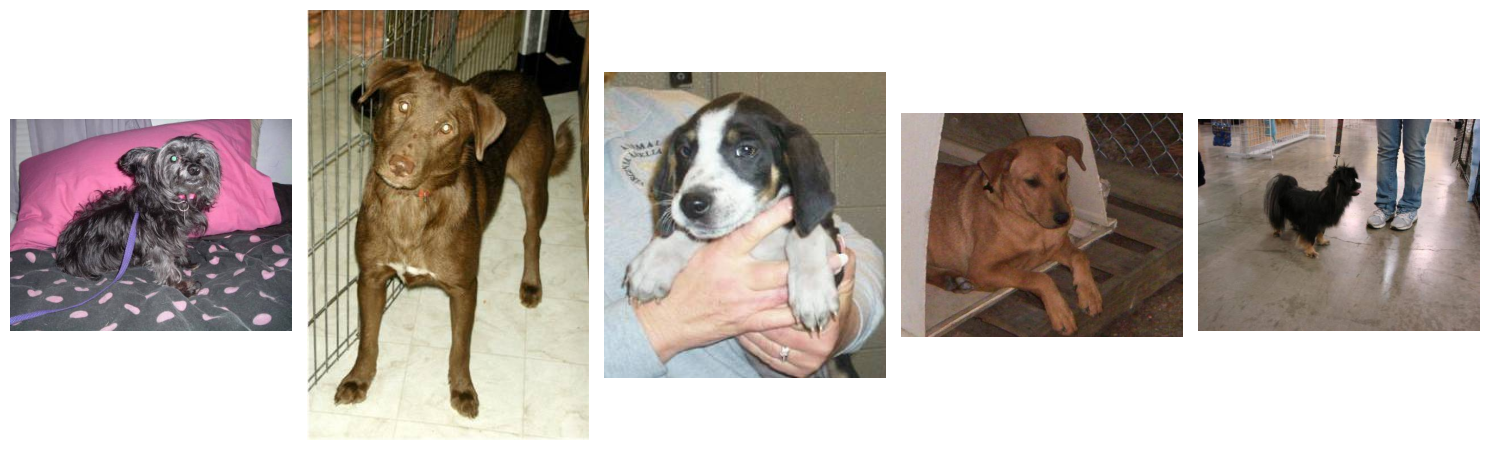

In [7]:
show_images_by_label("data", 5)

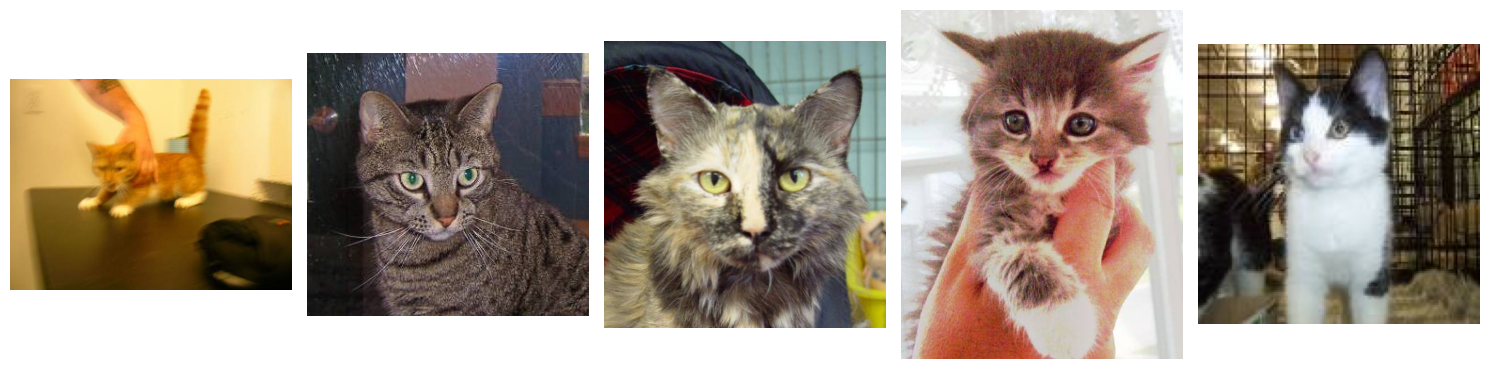

In [8]:
show_images_by_label("data", 5, "cat")

In [9]:
train_loader, val_loader, test_loader = get_loaders()

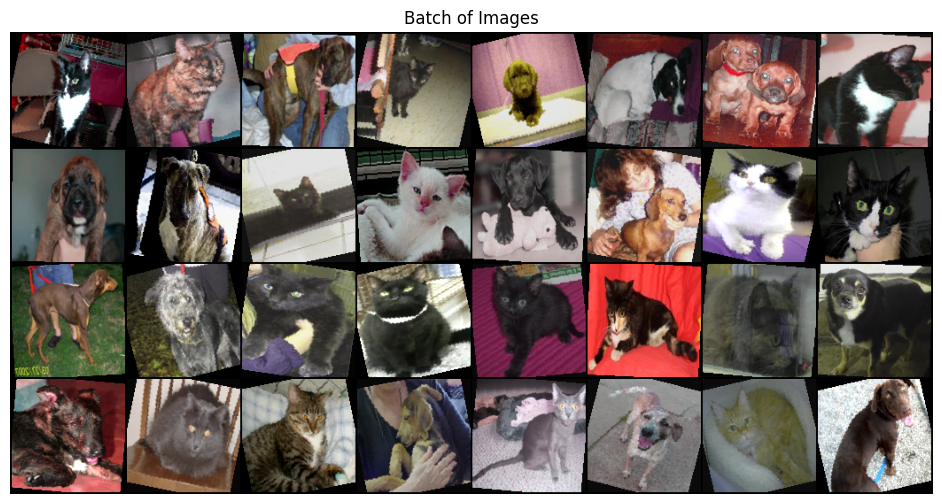

In [10]:
def show_batch(loader):
    images, _ = next(iter(loader))
    grid = torchvision.utils.make_grid(images, nrow=8, normalize=True)
    plt.figure(figsize=(12, 6))
    plt.imshow(grid.permute(1, 2, 0))
    plt.title("Batch of Images")
    plt.axis('off')
    plt.show()

show_batch(train_loader)

Here we can see our images after transformation. We resized images to be a 128x128 format. Noisiness was also introduced into the data, to simulate real world conditions. This noise included:

* Flipping the image horizontally
* Rotating the image slightly
* Adjusting color contrast, saturation and hue at random

 This allows for a more robust classifier since it diversifies what data it can understand.

### Results and Conclusion

In [20]:
results = pd.read_csv("results.csv", index_col=None)
results.head().to_markdown()

'|    |   Epoch |   Train_Losses |   Val_Losses |   Val_Accuracies |\n|---:|--------:|---------------:|-------------:|-----------------:|\n|  0 |       1 |       0.81793  |     0.599154 |          65.8667 |\n|  1 |       2 |       0.60273  |     0.52011  |          73.7333 |\n|  2 |       3 |       0.559962 |     0.457278 |          78.5333 |\n|  3 |       4 |       0.517238 |     0.42147  |          80.7733 |\n|  4 |       5 |       0.481194 |     0.381921 |          83.12   |'

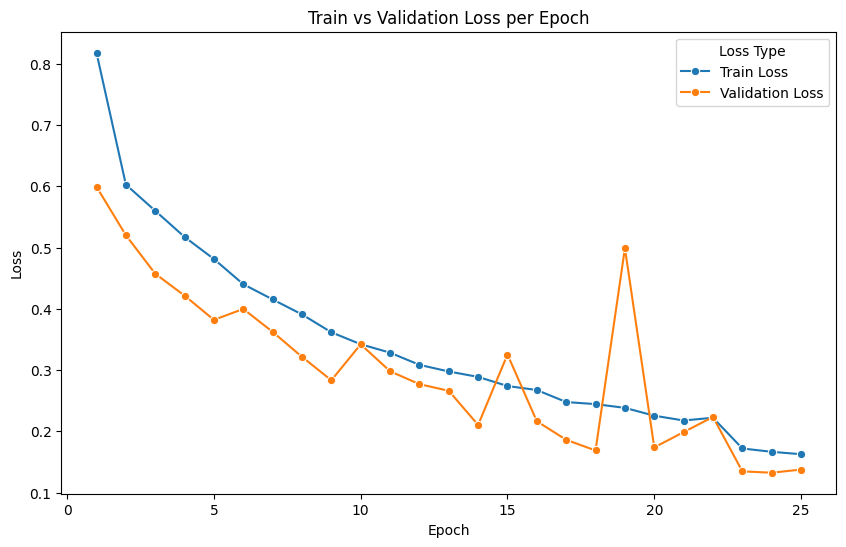

In [17]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Epoch', y='value', hue='variable', 
                  data=pd.melt(results, id_vars=["Epoch"], value_vars=["Train_Losses", "Val_Losses"]),
                  marker="o")

ax.set_title('Train vs Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Train Loss', 'Validation Loss'], title='Loss Type')

plt.show()

Here we can see the results of our training. We notice that there are a few points where the model loss gets worse. This could possibly be due to to the scheduler. What the scheduler does is that it adjust the learning rate of the classifier if we notice that it starts to stagnate. This'll cause some initial loss, but quickly taper off and improve the model.

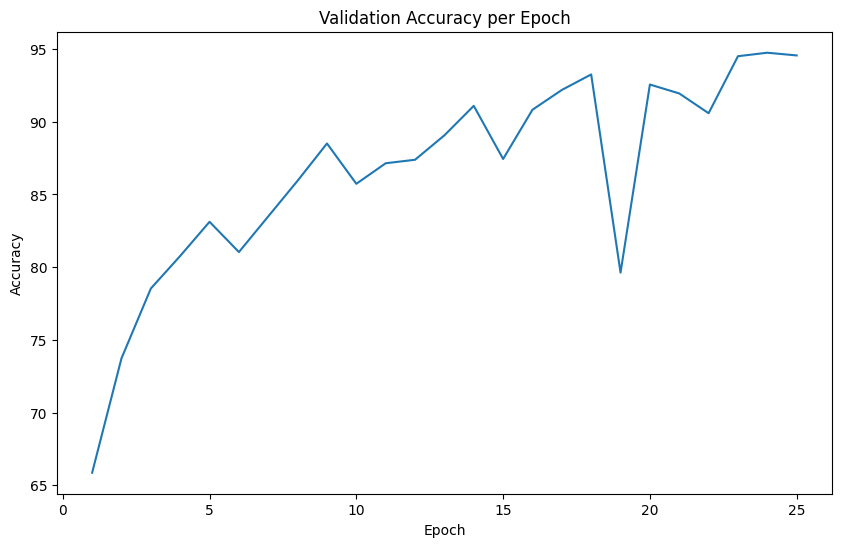

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Epoch', y='Val_Accuracies', data=results)

plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Here we can see a solid growth of our validation accuracy, getting as high as approximately 95%.

In [36]:
model = ImageCNN()
model.load_state_dict(torch.load(MODEL_PATH))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
_, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Testing Accuracy: {test_acc:.2f}%")

Testing Accuracy: 94.37%


The image classification model achieved a high testing accuracy of 94.37%. This demonstrates the model's strong ability to correctly classify images, indicating effective learning and generalization. While the model performed well on the test set, further improvements could be explored through additional data, advanced architectures, or fine-tuning hyperparameters.